# 고객을 유지하기 위한 행동 예측하기 
#### 배경
* 기존 고객을 유지하는 것이 신규 고객을 획득하는 것보다 효과적이라는 것이 CRM 전략의 핵심 내용 중 하나이고 비용적인 관점에서 고객을 유지하는 것이 신규고객을 호기득하는 것에 비해 5배 효과적임. 

#### 목표
* 이탈하는 고객들의 특성 파악
* 파악한 특성들을 이용하여 기대 가치가 큰 고객의 이탈 징후를 잘 탐지하는 예측 모델 생성.
[참고](https://brunch.co.kr/@gimmesilver/53)

* 더 나아가)
    * 이탈 원인 파악

[kaggle  데이터](https://www.kaggle.com/blastchar/telco-customer-churn) 
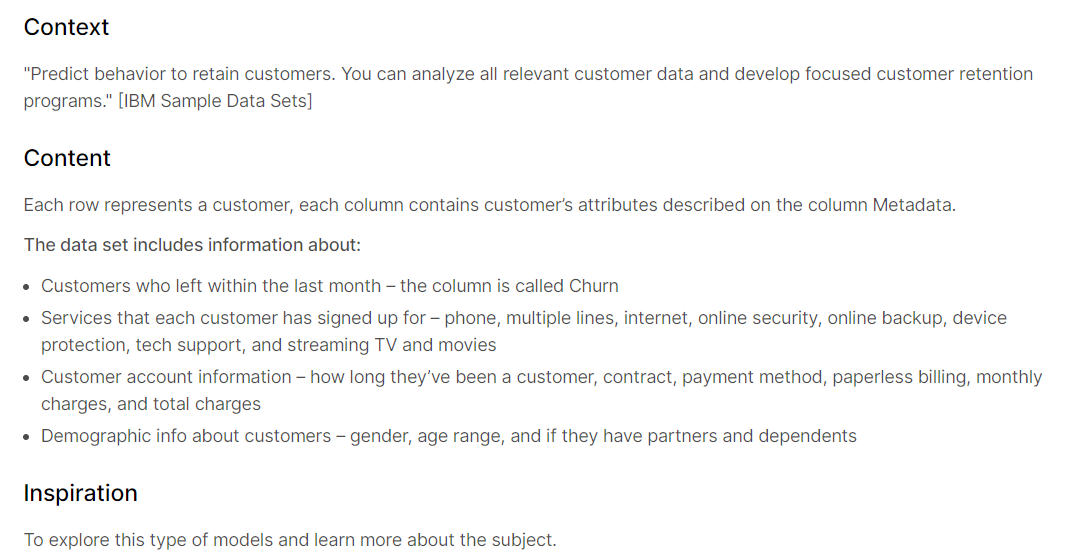

* 각 고객이 가입한 서비스: 전화, 다중 회선, 인터넷, 온라인 보안, 온라인 백업, 장치 보호, 기술 지원, 스트리핑 TV 및 영화
* 고객 계정 정보: 고객, 계약, 결제 방법, 디지털 청구서, 월별 요금 및 총 요금
* 고객에 대한 인구 통계 정보: 성별, 연령 범위, 파트너 및 부양 가족이 있는지 여부 

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
from matplotlib import pyplot as plt
%matplotlib inline

import matplotlib.gridspec as gridspec

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

pd.set_option("display.max_columns",None) # 모든 열을 출력 

import warnings
warnings.filterwarnings("ignore")

#### 데이터 불러오기 

In [2]:
df = pd.read_csv("../../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.shape

(7043, 21)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* TotalCharges 변수는 수치형 변수인데 type이 object라고 되어있음.

In [6]:
df["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

* SeniorCitizen 변수는 고령자 유무에 관한 범주형인데 int64로 되어있음. 

In [7]:
# df['TotalCharges'] = df['TotalCharges'].astype('float32')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # ValueError 무시 

In [8]:
# 수치형 변수에 대해서만 요약
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype("object")

#### 결측치 확인하기 

<AxesSubplot:>

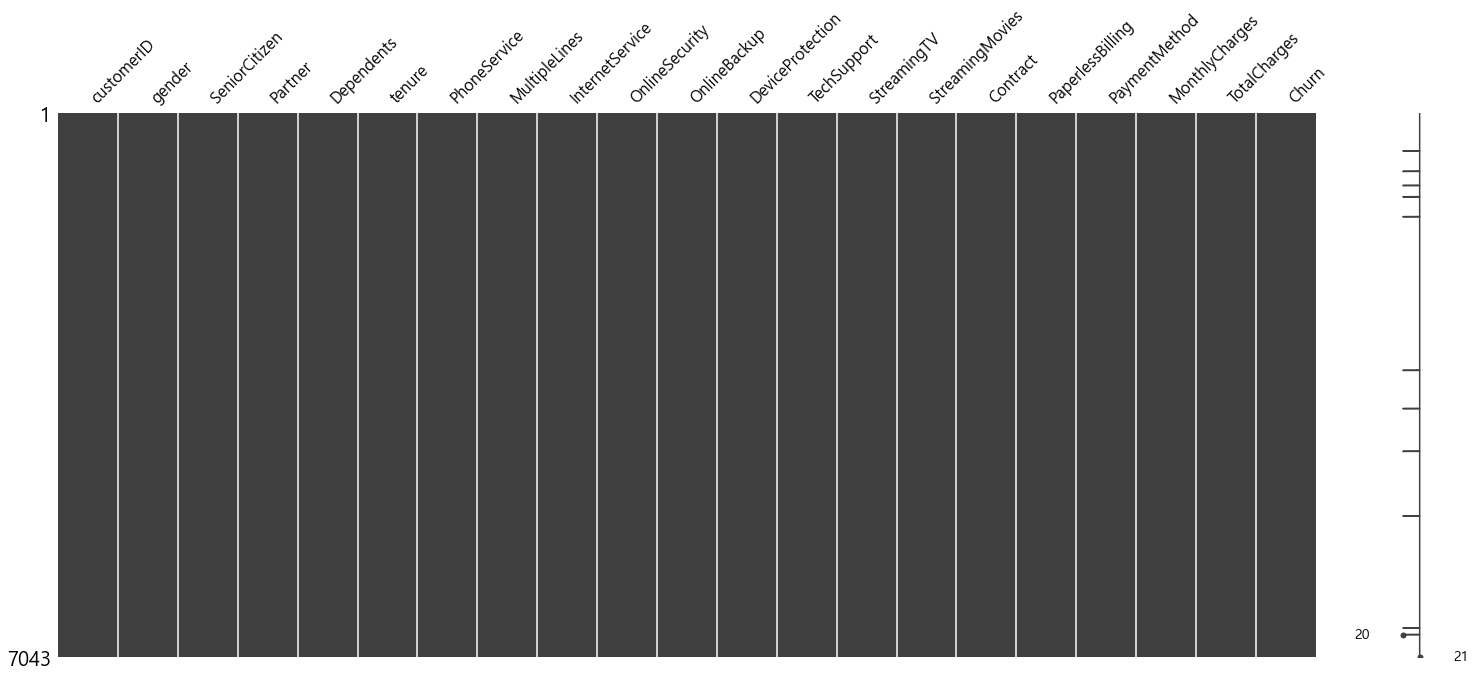

In [10]:
msno.matrix(df)

<AxesSubplot:>

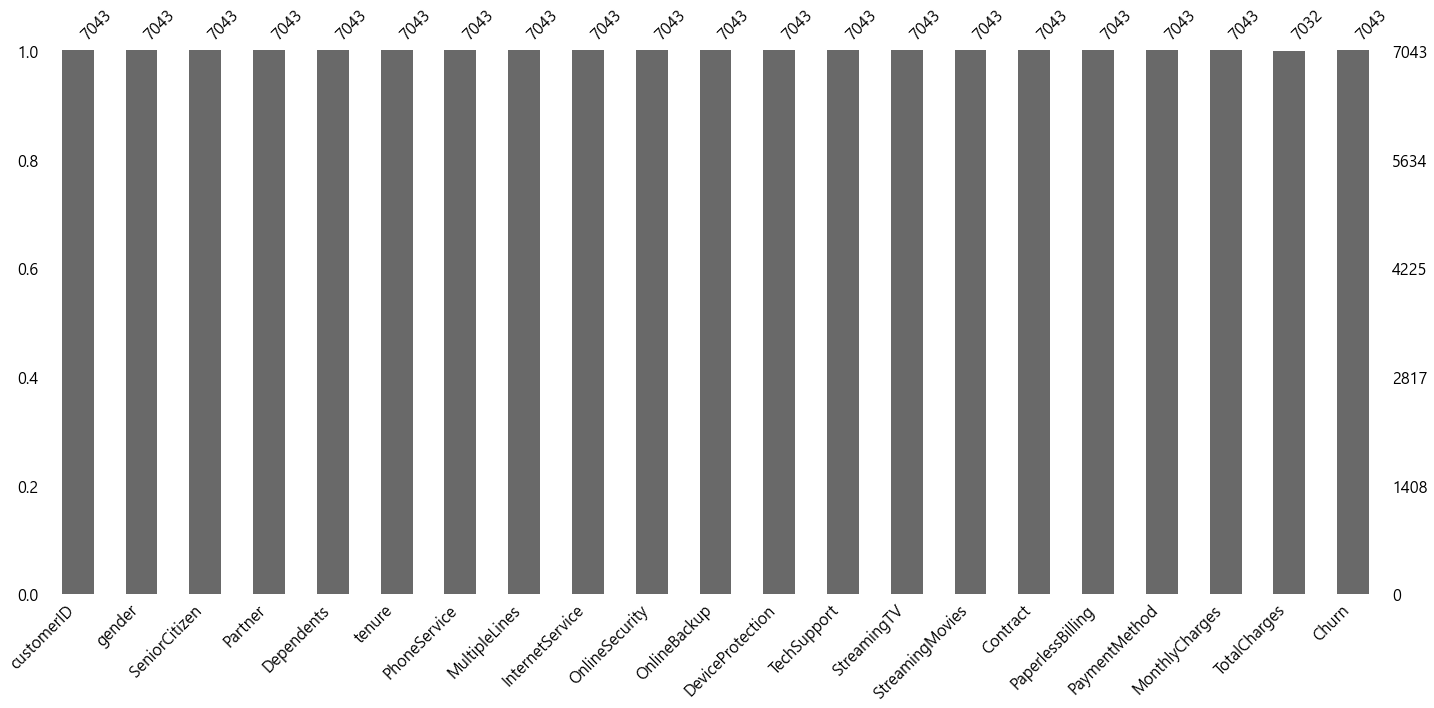

In [11]:
msno.bar(df)

In [12]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Text(0.5, 1.0, '지난 달에 고객 이탈 유무')

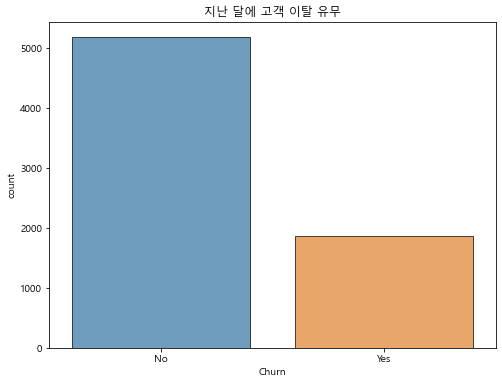

In [13]:
plt.figure(figsize = (8,6))
sns.countplot(df["Churn"], edgecolor="black",alpha=0.7)  # alpha를 이용하여 색 조정 
plt.title("지난 달에 고객 이탈 유무")

In [14]:
df = df.drop("customerID",axis = 1)

#### 범주형 변수들의 값들 확인

In [15]:
for column in df.columns:
    if df[column].dtypes==object:
        print(str(column)+ ' : '+ str(df[column].unique()))
        print (df[column].value_counts())
        print('------------------------------')

gender : ['Female' 'Male']
Male      3555
Female    3488
Name: gender, dtype: int64
------------------------------
SeniorCitizen : [0 1]
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
------------------------------
Partner : ['Yes' 'No']
No     3641
Yes    3402
Name: Partner, dtype: int64
------------------------------
Dependents : ['No' 'Yes']
No     4933
Yes    2110
Name: Dependents, dtype: int64
------------------------------
PhoneService : ['No' 'Yes']
Yes    6361
No      682
Name: PhoneService, dtype: int64
------------------------------
MultipleLines : ['No phone service' 'No' 'Yes']
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
------------------------------
InternetService : ['DSL' 'Fiber optic' 'No']
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
------------------------------
OnlineSecurity : ['No' 'Yes' 'No internet service']
No                     3498
Yes 

In [16]:
category_feature = []

for column in df.columns:
    if df[column].dtypes==object:
        category_feature.append(column)

In [17]:
print(len(category_feature))
category_feature.remove("Churn")
print(category_feature)
print(len(category_feature))

17
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
16


#### 범주형 변수에 대한 plot

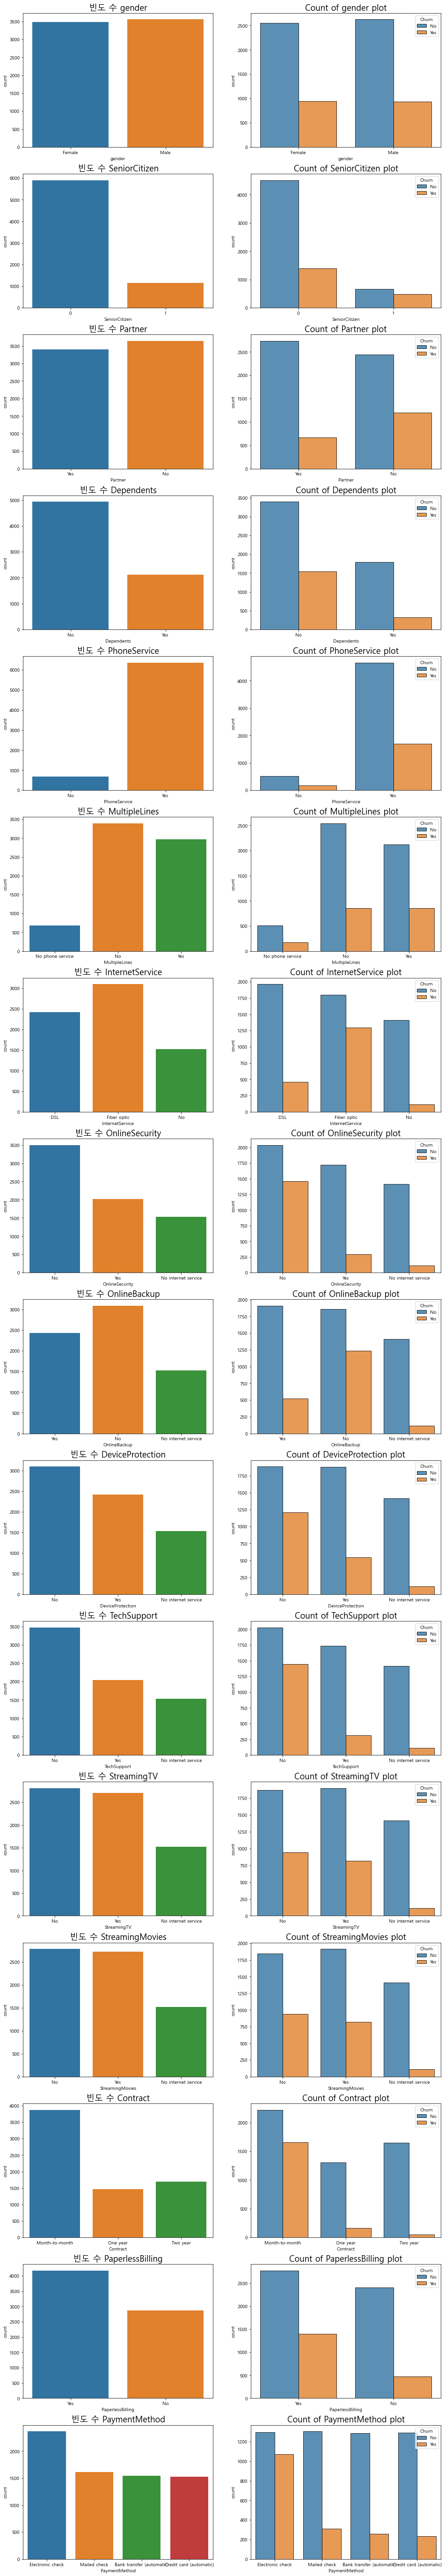

In [18]:
f, ax = plt.subplots(16,2,figsize=[16,100])

for i, cn in enumerate(df[category_feature]):
    sns.countplot(df[cn], ax = ax[i,0])
    ax[i,0].set_title("빈도 수 "+cn, fontsize = 18)
    
    sns.countplot(df[cn],data = df,hue = "Churn", edgecolor="black",alpha=0.8,ax = ax[i, 1])
    ax[i,1].set_title("Count of "+cn+" plot", fontsize = 18)

plt.show()

### 컬럼별로 나눠봤을 때 전체적으로 떠나지 않은 고객이 이탈 고객보다 더 많음. 

* 성별에 따라서는 크게 차이가 없음. 
* 고령자가 아닌 고객이 고령자인 고객보다 더 많고 이탈하는 고객과 이탈하지 않는 고객 모두 고령자인 고객에 비해 많음. 
* partner가 없는 고객의 수가 더 많고 없는 고객들의 지난 달 더 이탈함.
    * 이는 중요한 feature로 사용할 수 있을 것이라 예상. 

* 부양 가족이 있는 고객들이 없는 고객보다 약 3000명 정도 더 많고 고객들이 더 많이 이탈함.
* 폰서비스를 이용하는 고객들이 약 5000명 정도로 이용하지 않는 고객보다 훨씬 더 많고 폰 서비스를 이용하는 고객 중에서도 떠나지 않은 고객들이 훨씬 더 많음. 
* 폰 서비스를 사용하는 고객 중 다중 회선을 사용하는 고객이 그렇지 않은 고객보다 많고 다중회귀선을 사용하지 않는 고객이 더 많이 이탈하지 않음. 
> 다중 회선을 사용하는 것에 불편함을 느낀 것일까?

* 인터넷 서비스를 사용하는 고객 중 Fiber optic를 이용하는 고객의 수가 더 많고 Fiber optic을 사용하는 고객이 DSL을 사용하는 고객보다 더 많이 이탈하고 DSL을 사용하는 고객이 더 많이 이탈하지 않음.
> DSL이 Fiber보다 더 좋은가?

* 온라인 보안을 이용하지 않는 고객이 이용하는 고객의 수보다 더 많고 이용하지 않는 고객들의 지난 달 이탈한 고객과 그렇지 않은 고객 모두 더 많음.
> 이는 온라인 보안 유무 별 고객의  빈도수에 비례해보임.

* 온라인 백업을 이용하지 않는 고객의 수가 이용하는 고객보다 더 많고 이탈한 고객의 수도 더 많지만 이탈하지 않은 고객의 수는 온라인 백업에 가입한 사람이 더 많음. 

* 장치 보호에 가입하지 않은 고객의 수가 가입한 고객의 수보다 많고 가입하지 않은 고객이 더 많이 이탈함. 

* 기술 지원 서비스에 가입하지 않은 고객의 수가 가입한 고객의 수보다 많고 이탈한 고객과 그렇지 않은 고객모두 기술 지원 서비스에 가입한 고객보다 많음. 

* 스트리밍 TV 서비스에 가입하지 않은 고객이 가입한 고객보다 많고 가입한 고객이 더 이탈하지 않고 가입하지 않은 고객이 더 많이 이탈함. 

* 스트리밍 영화 서비스에 가입하지 않은 고객이 더 많고 가입하지 않은 고객이 가입한 고객보다 더 많이 이탈하고 가입한 고객이 더 많이 이탈하지 않음. 

* 계약 기간을 월마다로 설정한 고객이 가장 많고 가장 많이 이탈, 이탈하지 않은 고객도 가장 많음. 이에 반해 1년으로 계약한 고객들의 수가 2년으로 계약한 고객의 수보다 적은데 더 많이 이탈함. 

* 디지털 청구서를 신청한 고객의 수가 더 많고 지난 달 이탈한 사람과 그렇지 않은 사람 모두 더 많음.

* 결제 방법을 Electronic check(전자 결제 시스템)를 신청한 고객의 수가 가장 많고 메일로 체크, 은행을 통해 수동으로 결제, 신용카드 순으로 많음. 떠난 고객들의 빈도수의 순위도 동일하고 전자 결제 시스템과 다른 결제 방식들 간의 고객 수가 꽤 차이남에도 불구하고 이탈하지 않은 고객의 수는 비슷함. 


In [36]:
pd.crosstab([df.PaperlessBilling,df.PaymentMethod,df.SeniorCitizen],df.Churn,margins=True).style.background_gradient(cmap='gray_r')

In [33]:
chi_res  = chi2_contingency(pd.crosstab(df.SeniorCitizen, df.Churn))
print('Chi2 Statistic: {}\np-value: {}\ndegree of freedom:{}'.format(round(chi_res[0],2), round(chi_res[1],2), round(chi_res[2],2)))

Chi2 Statistic: 159.43
p-value: 0.0
degree of freedom:1


In [89]:
from scipy.stats import chi2_contingency

p_feature = []

for col_ in category_feature:
    chi, p, dof, expected = chi2_contingency(pd.crosstab(df[col_], df.Churn))
    
    if p<=0.05:
        p_feature.append(col_)

        print(col_,
              "Chi2 Statistic: {}".format(round(chi,2)),
              "p-value (0.05): {}".format(round(p,2)),
              "degree of freedom: {}".format(dof),
              "",
              "expected value: \n{}".format(pd.DataFrame(np.round_(expected,2), columns=['No','Yes'])),
              "",
              "original value: \n{}".format(pd.DataFrame(pd.crosstab(df[col_], df.Churn))),

              "-----------------------------------", sep = "\n" )
    


SeniorCitizen
Chi2 Statistic: 159.43
p-value (0.05): 0.0
degree of freedom: 1

expected value: 
        No      Yes
0  4335.05  1565.95
1   838.95   303.05

original value: 
Churn            No   Yes
SeniorCitizen            
0              4508  1393
1               666   476
-----------------------------------
Partner
Chi2 Statistic: 158.73
p-value (0.05): 0.0
degree of freedom: 1

expected value: 
        No     Yes
0  2674.79  966.21
1  2499.21  902.79

original value: 
Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669
-----------------------------------
Dependents
Chi2 Statistic: 189.13
p-value (0.05): 0.0
degree of freedom: 1

expected value: 
        No      Yes
0  3623.93  1309.07
1  1550.07   559.93

original value: 
Churn         No   Yes
Dependents            
No          3390  1543
Yes         1784   326
-----------------------------------
MultipleLines
Chi2 Statistic: 11.33
p-value (0.05): 0.0
degree of freedom: 2

expected value: 
        No 

In [67]:
print("category feature count {}".format(len(category_feature)))
print("p-value less 0.05 count {}".format(len(p_feature)))

category feature count 16
p-value less 0.05 count 14


In [68]:
category_feature

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [69]:
p_feature

['SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

이원 카이제곱 검정 결과, 16개의 범주형 변수 중 종속변수와 관계없는 변수는 gender, PhoneService이다.

### 인터넷를 신청한 고객 중 관련 서비스를 이용하는 고객의 이탈한 비율

In [104]:
# is_no_cor_features =  ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

# for is_no_feature in is_no_cor_features:
#     print("# {}".format(is_no_feature),"",sep='\n')
#     print(pd.crosstab([df.InternetService,df[is_no_feature]],df.Churn,margins=True,normalize=True),
#          '-------------------------------------------------------------------',sep = '\n')

# OnlineSecurity

Churn                                      No       Yes       All
InternetService OnlineSecurity                                   
DSL             No                   0.126935  0.049269  0.176203
                Yes                  0.151640  0.015902  0.167542
Fiber optic     No                   0.162289  0.158171  0.320460
                Yes                  0.093142  0.025983  0.119125
No              No internet service  0.200625  0.016044  0.216669
All                                  0.734630  0.265370  1.000000
-------------------------------------------------------------------
# OnlineBackup

Churn                                      No       Yes       All
InternetService OnlineBackup                                     
DSL             No                   0.140849  0.048701  0.189550
                Yes                  0.137725  0.016470  0.154196
Fiber optic     No                   0.122533  0.126367  0.248900
                Yes                  0.1

In [106]:
pd.crosstab([df.InternetService,df.OnlineSecurity],df.Churn,margins=True,normalize=True).style.background_gradient(cmap='summer_r')

In [91]:
pd.crosstab([df.InternetService,df.OnlineBackup],df.Churn,margins=True,normalize=True).style.background_gradient(cmap='summer_r')

In [92]:
pd.crosstab([df.InternetService,df.DeviceProtection],df.Churn,margins=True,normalize=True).style.background_gradient(cmap='summer_r')

In [105]:
pd.crosstab([df.InternetService,df.TechSupport],df.Churn,margins=True,normalize=True).style.background_gradient(cmap='summer_r')

In [107]:
pd.crosstab([df.InternetService,df.StreamingTV],df.Churn,margins=True,normalize=True).style.background_gradient(cmap='summer_r')

In [108]:
pd.crosstab([df.InternetService,df.StreamingMovies],df.Churn,margins=True,normalize=True).style.background_gradient(cmap='summer_r')

인터넷 서비스 중 Fiber optic 를 사용하고 있는 고객들 중 온라인 보안, 백업, 장치 보호, 기술 지원 서비스를 신청하지 않은 고객들의 이탈한 비율이 더 많음.    

스트리밍 TV 및 영화 서비스는 이용하는 고객과 이용하지 않는 고객 모두 크게 차이없이 이탈할 가능성이 높음. 

### 계정 정보에 따른 이탈한 고객의 비율

In [114]:
pd.crosstab([df.PaperlessBilling,df.PaymentMethod,df.Contract],df.Churn,margins=True,normalize=True).style.background_gradient(cmap='summer_r')

#### 수치형 변수에 대한 plot

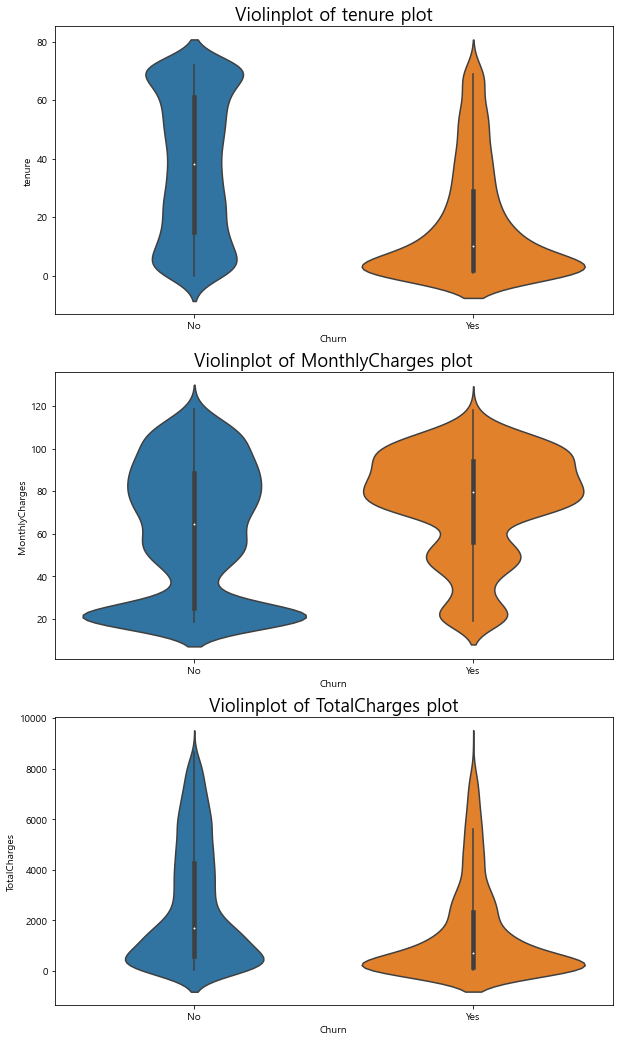

In [223]:
num_feature = ["tenure","MonthlyCharges","TotalCharges"]

plt.figure(figsize = (10,18))

gs = gridspec.GridSpec(3,1)

for i, col in enumerate(num_feature):
    ax = plt.subplot(gs[i])

    sns.violinplot(x='Churn',y=col,data=df)
    ax.set_title("Violinplot of "+col+" plot", fontsize = 18)

plt.show()

* 고객이 회사에 머문 개월 수가 0-20개월인 고객들이 가장 많이 이탈하고 회사에 머문 개월 수가 많아질수록 이탈하는 고객의 수가 적어짐. 
* 이탈하지 않는 고객들의 개월 수는 대체로 모든 개월 수에 비슷하고 0-20, 60-80 정도의 고객들의 이탈하지 않는 수가 더 많음.

* 월별 요금제를 많이 낸 고객들이 많이 떠나고 월별 요금을 적게 낸 고객들이 덜 떠남.

* 총 요금은 떠나지 않은 고객과 떠난 고객 모두 낮은 금액을 지불함. 

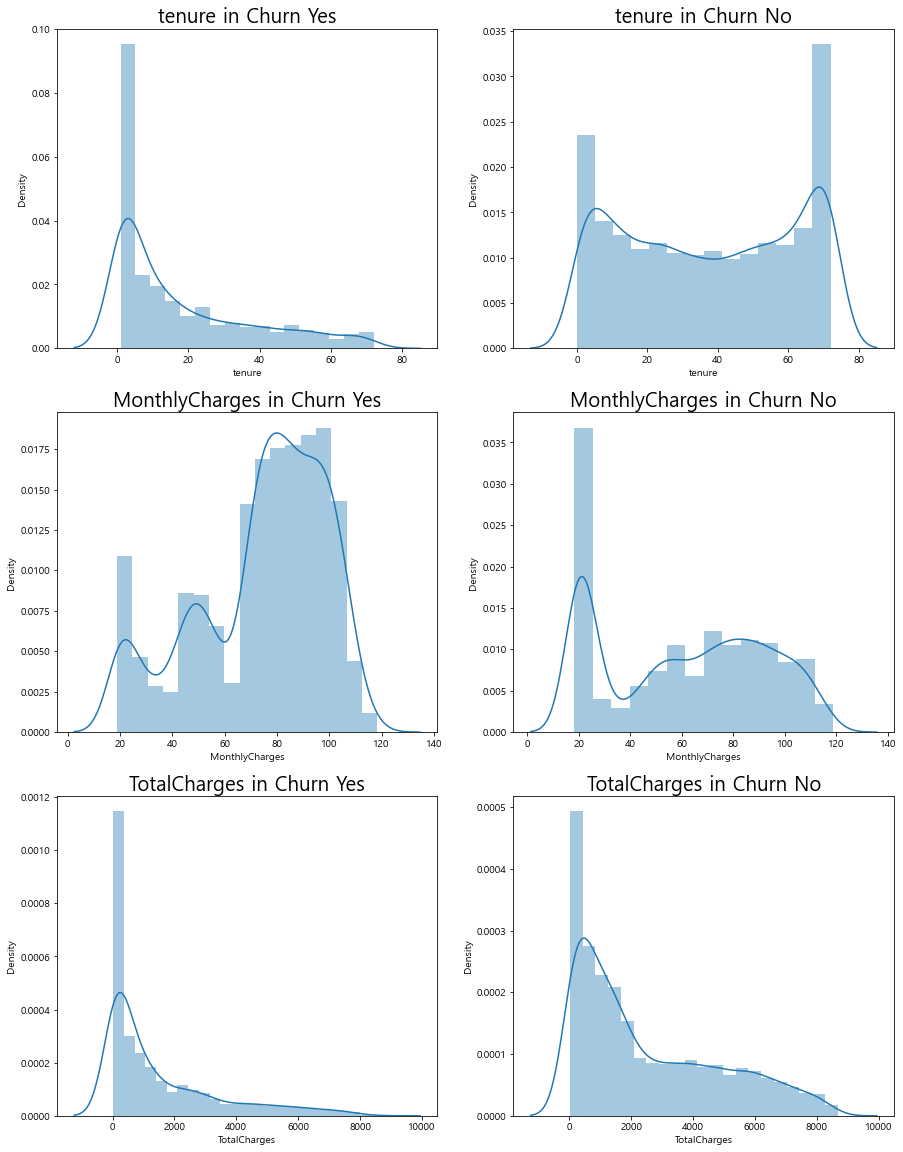

In [224]:
f,ax=plt.subplots(3,2,figsize=(15,20))

for i, col in enumerate(num_feature):
    sns.distplot(df[df['Churn']=="Yes"][col],ax=ax[i,0])
    ax[i,0].set_title(col+' in Churn Yes',fontsize = 20)
    sns.distplot(df[df['Churn']=="No"][col],ax=ax[i,1])
    ax[i,1].set_title(col+' in Churn No',fontsize = 20)
plt.show()

* 고객이 회사에 머문 개월 수는 이탈하지 않은 고객의 분포가 넓고 이탈한 고객의 분포는 왼쪽에 치우쳐져 있음.
* 월별 요금제는 이탈한 고객의 분포와 이탈하지 않은 고객의 분포 모두 넓게 분포해 있으며 이탈한 고객은 대체로 80-120에 많은 반면 이탈하지 않은 고객은 20-25에 많음. 

Text(0.5, 1.0, 'Boxplot of TotalCharges')

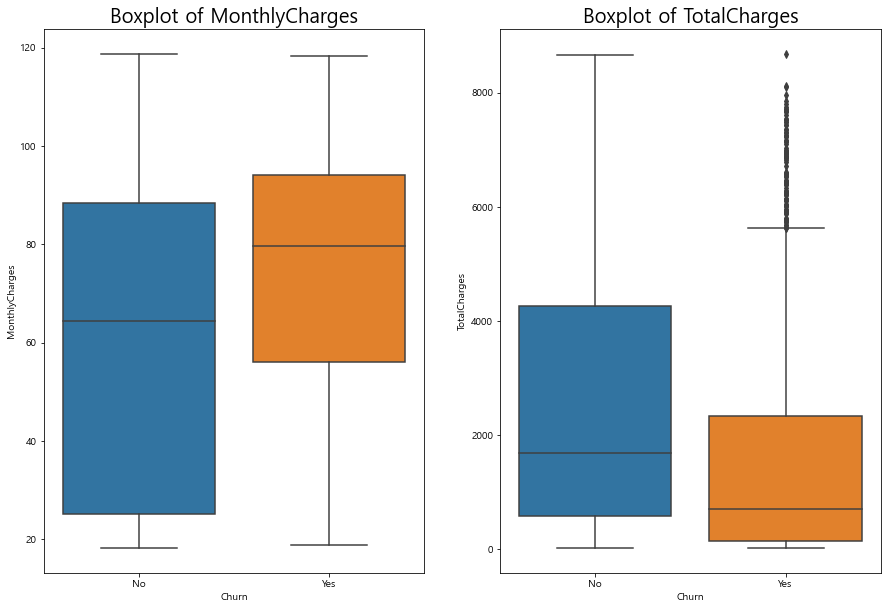

In [225]:
f, ax = plt.subplots(1,2,figsize = (15,10))

sns.boxplot(df['Churn'],df['MonthlyCharges'],ax = ax[0])
ax[0].set_title("Boxplot of MonthlyCharges", fontsize = 20)
sns.boxplot(df['Churn'],df['TotalCharges'],ax = ax[1])
ax[1].set_title("Boxplot of TotalCharges", fontsize = 20)

In [226]:
num_feature.append("Churn")

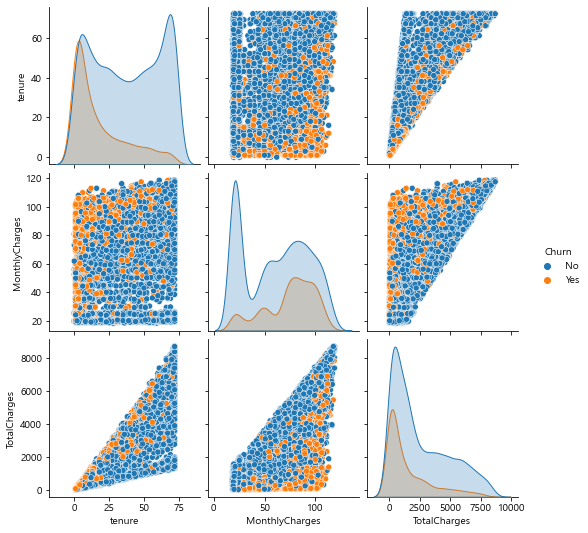

In [227]:
pairplot_feature = df[num_feature]
sns.pairplot(pairplot_feature, hue = "Churn")

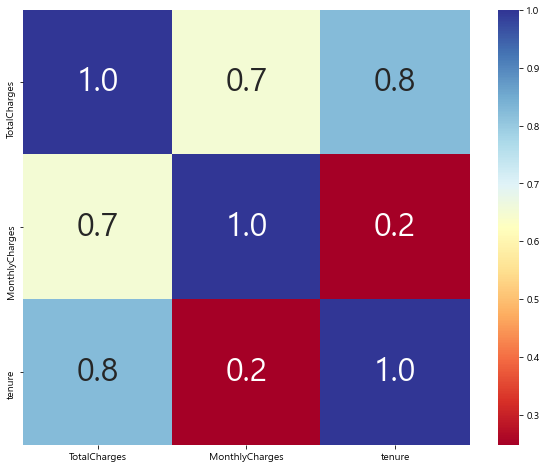

In [238]:
plt.figure(figsize = (10, 8))
sns.heatmap(df_new[["TotalCharges","MonthlyCharges","tenure"]].corr(), cmap="RdYlBu", annot=True, fmt=".1f",annot_kws={'size':32})
plt.show()

In [239]:
df_new = pd.get_dummies(df)
df_new

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,1,29.85,29.85,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,34,56.95,1889.50,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,2,53.85,108.15,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,45,42.30,1840.75,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,2,70.70,151.65,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0
7039,72,103.20,7362.90,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0
7040,11,29.60,346.45,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
7041,4,74.40,306.60,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1


### 추후 할일
* 카이제곱 검정을 이용하여 종속변수와 독립변수간 카이제곱 검정